<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [3]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-29 14:05:39.660275


In [5]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [6]:
# All States
states = pop['State'].tolist()
states.sort()

In [7]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [8]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [9]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

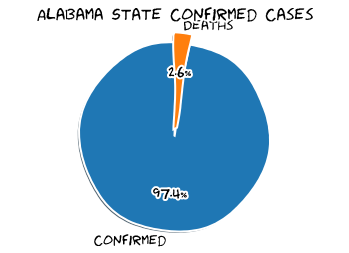

Alabama State Total Population
4887871
Alabama State Confirmed
35441 (0.7250805105126548% of population)
Alabama State Deaths
919 (2.5930419570553878% of confirmed)



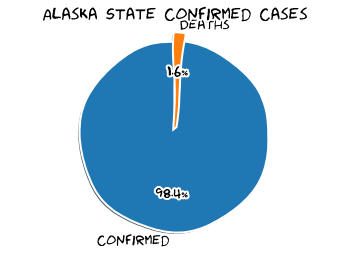

Alaska State Total Population
737438
Alaska State Confirmed
880 (0.11933206588214873% of population)
Alaska State Deaths
14 (1.5909090909090908% of confirmed)



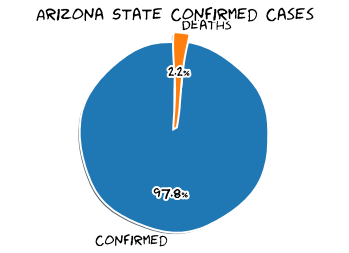

Arizona State Total Population
7171646
Arizona State Confirmed
73920 (1.0307257218217407% of population)
Arizona State Deaths
1594 (2.1563852813852815% of confirmed)



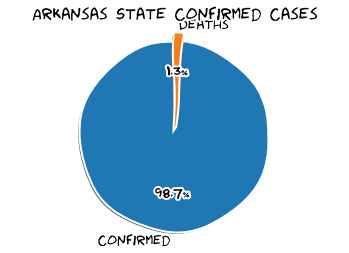

Arkansas State Total Population
3013825
Arkansas State Confirmed
19818 (0.6575696996341858% of population)
Arkansas State Deaths
264 (1.3321223130487436% of confirmed)



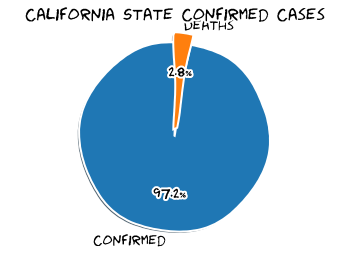

California State Total Population
39557045
California State Confirmed
215417 (0.5445730337036045% of population)
California State Deaths
5934 (2.7546572461783425% of confirmed)



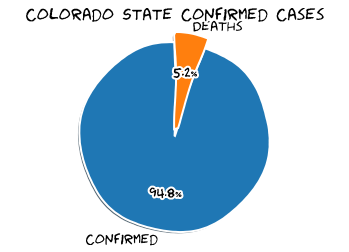

Colorado State Total Population
5695564
Colorado State Confirmed
32290 (0.5669324407556477% of population)
Colorado State Deaths
1676 (5.190461443171261% of confirmed)



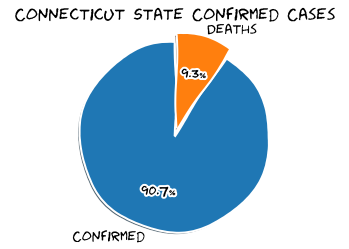

Connecticut State Total Population
3572665
Connecticut State Confirmed
46303 (1.2960353125747865% of population)
Connecticut State Deaths
4316 (9.321210288750189% of confirmed)



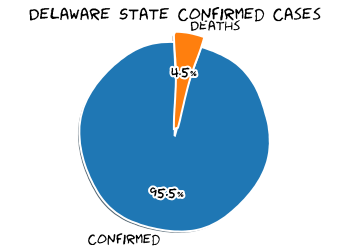

Delaware State Total Population
967171
Delaware State Confirmed
11226 (1.1607047771283465% of population)
Delaware State Deaths
507 (4.516301443078568% of confirmed)



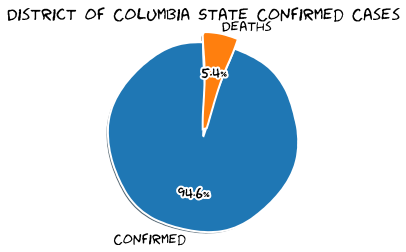

District of Columbia State Total Population
702455
District of Columbia State Confirmed
10248 (1.4588834871984682% of population)
District of Columbia State Deaths
550 (5.366900858704137% of confirmed)



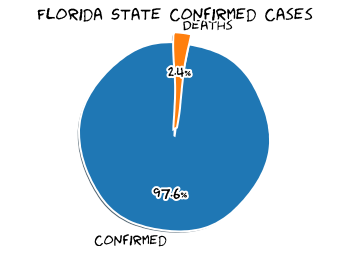

Florida State Total Population
21299325
Florida State Confirmed
141075 (0.6623449334662014% of population)
Florida State Deaths
3419 (2.4235335814283183% of confirmed)



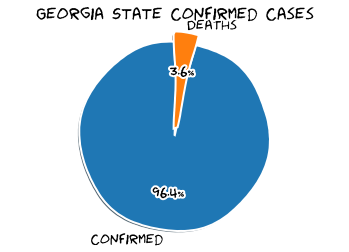

Georgia State Total Population
10519475
Georgia State Confirmed
77210 (0.7339719900470318% of population)
Georgia State Deaths
2778 (3.597979536329491% of confirmed)



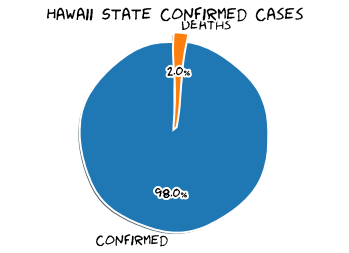

Hawaii State Total Population
1420491
Hawaii State Confirmed
899 (0.06328797577738965% of population)
Hawaii State Deaths
18 (2.0022246941045605% of confirmed)



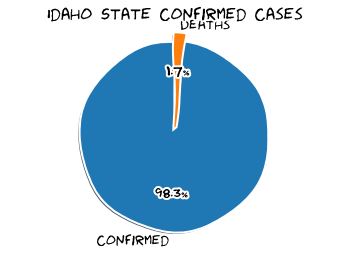

Idaho State Total Population
1754208
Idaho State Confirmed
5322 (0.3033847753516117% of population)
Idaho State Deaths
91 (1.7098835024426908% of confirmed)



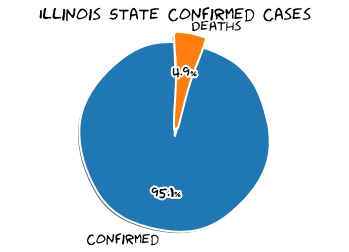

Illinois State Total Population
12741080
Illinois State Confirmed
141723 (1.1123311367639164% of population)
Illinois State Deaths
6888 (4.860185008784742% of confirmed)



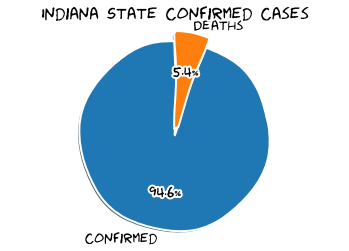

Indiana State Total Population
6691878
Indiana State Confirmed
44930 (0.6714109253037787% of population)
Indiana State Deaths
2427 (5.401736033830403% of confirmed)



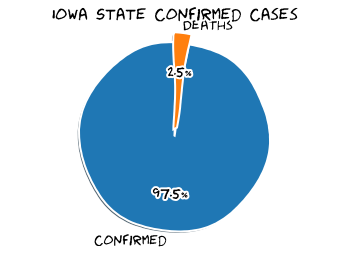

Iowa State Total Population
3156145
Iowa State Confirmed
28623 (0.906897496788012% of population)
Iowa State Deaths
706 (2.46654788107466% of confirmed)



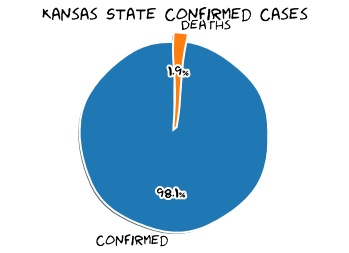

Kansas State Total Population
2911510
Kansas State Confirmed
13847 (0.4755951379181249% of population)
Kansas State Deaths
268 (1.9354372788329601% of confirmed)



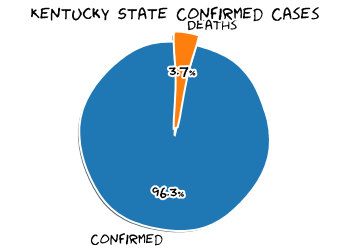

Kentucky State Total Population
4468402
Kentucky State Confirmed
15232 (0.3408824899818772% of population)
Kentucky State Deaths
558 (3.663340336134454% of confirmed)



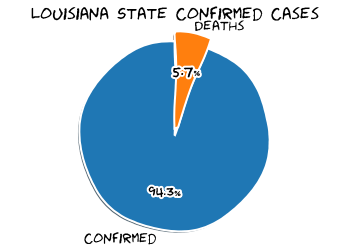

Louisiana State Total Population
4659978
Louisiana State Confirmed
56236 (1.2067868131566286% of population)
Louisiana State Deaths
3199 (5.688526922256206% of confirmed)



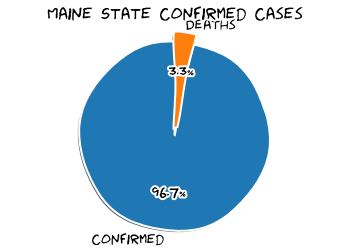

Maine State Total Population
1338404
Maine State Confirmed
3191 (0.23841829522326594% of population)
Maine State Deaths
104 (3.2591664055155123% of confirmed)



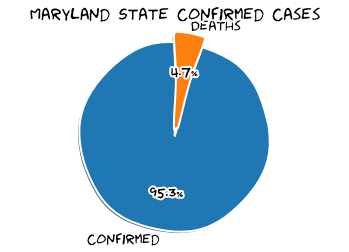

Maryland State Total Population
6042718
Maryland State Confirmed
66777 (1.1050821832162283% of population)
Maryland State Deaths
3142 (4.7052128726956886% of confirmed)



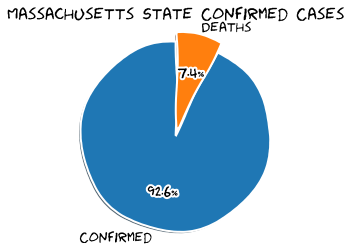

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
108667 (1.5743937141895952% of population)
Massachusetts State Deaths
8059 (7.416234919524786% of confirmed)



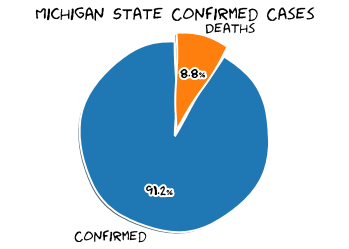

Michigan State Total Population
9995915
Michigan State Confirmed
69946 (0.6997458461781638% of population)
Michigan State Deaths
6157 (8.802504789408973% of confirmed)



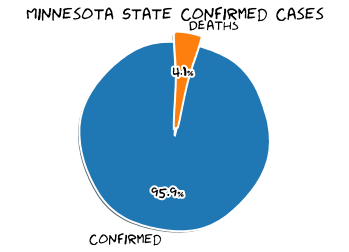

Minnesota State Total Population
5611179
Minnesota State Confirmed
35549 (0.6335388694604112% of population)
Minnesota State Deaths
1460 (4.107007229457931% of confirmed)



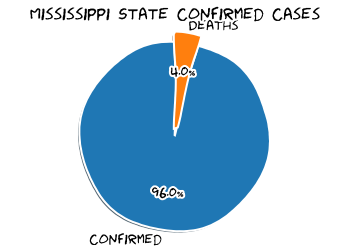

Mississippi State Total Population
2986530
Mississippi State Confirmed
25892 (0.866959313986466% of population)
Mississippi State Deaths
1039 (4.012822493434266% of confirmed)



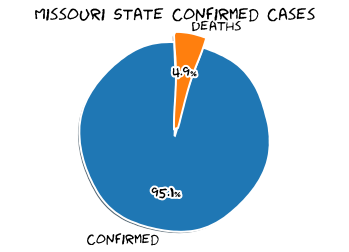

Missouri State Total Population
6126452
Missouri State Confirmed
20689 (0.3376995363711329% of population)
Missouri State Deaths
1004 (4.852820339310745% of confirmed)



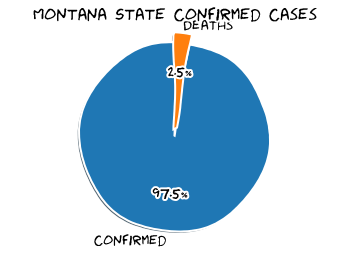

Montana State Total Population
1062305
Montana State Confirmed
863 (0.08123843905469709% of population)
Montana State Deaths
22 (2.549246813441483% of confirmed)



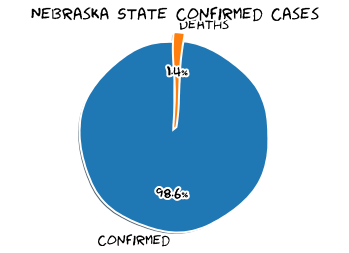

Nebraska State Total Population
1929268
Nebraska State Confirmed
18899 (0.9795943331875094% of population)
Nebraska State Deaths
267 (1.412773162601196% of confirmed)



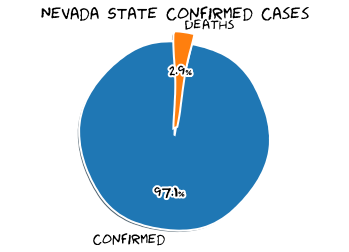

Nevada State Total Population
3034392
Nevada State Confirmed
17160 (0.5655169140967944% of population)
Nevada State Deaths
500 (2.9137529137529135% of confirmed)



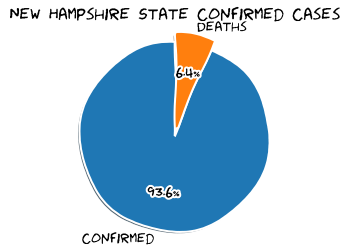

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
5747 (0.4236769586673528% of population)
New Hampshire State Deaths
367 (6.385940490690794% of confirmed)



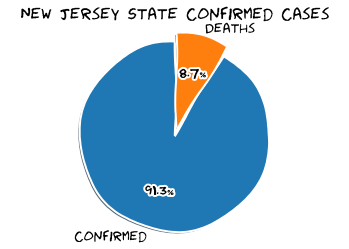

New Jersey State Total Population
8908520
New Jersey State Confirmed
171182 (1.9215537485463354% of population)
New Jersey State Deaths
14975 (8.747999205523946% of confirmed)



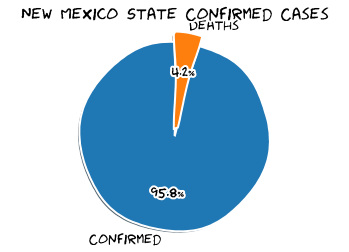

New Mexico State Total Population
2095428
New Mexico State Confirmed
11809 (0.5635602845814793% of population)
New Mexico State Deaths
492 (4.166313828435938% of confirmed)



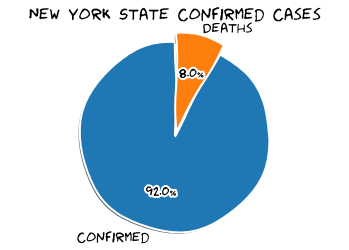

New York State Total Population
19542209
New York State Confirmed
392539 (2.0086726121903618% of population)
New York State Deaths
31397 (7.99844091924624% of confirmed)



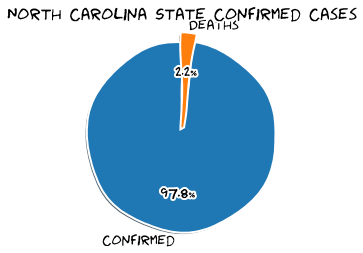

North Carolina State Total Population
10383620
North Carolina State Confirmed
62552 (0.602410334738752% of population)
North Carolina State Deaths
1355 (2.1661977234940526% of confirmed)



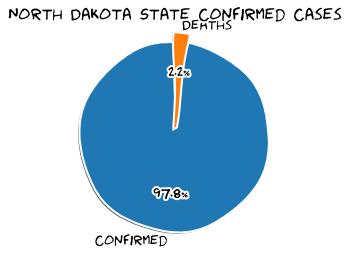

North Dakota State Total Population
760077
North Dakota State Confirmed
3539 (0.4656107210190547% of population)
North Dakota State Deaths
79 (2.2322690025430916% of confirmed)



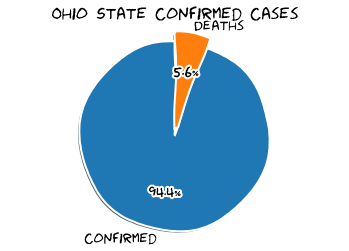

Ohio State Total Population
11689442
Ohio State Confirmed
50309 (0.43037982480258685% of population)
Ohio State Deaths
2807 (5.579518575205231% of confirmed)



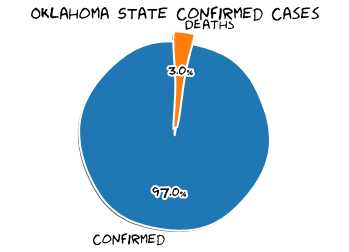

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
12947 (0.3283474665356692% of population)
Oklahoma State Deaths
385 (2.9736618521665252% of confirmed)



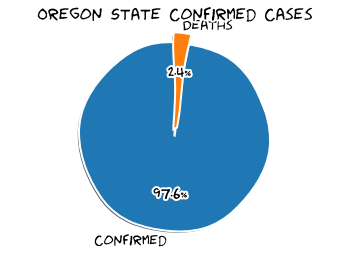

Oregon State Total Population
4190713
Oregon State Confirmed
8341 (0.19903534315043764% of population)
Oregon State Deaths
202 (2.421771969787795% of confirmed)



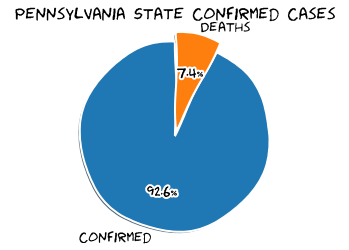

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
89863 (0.7016676739236015% of population)
Pennsylvania State Deaths
6606 (7.351190144998497% of confirmed)



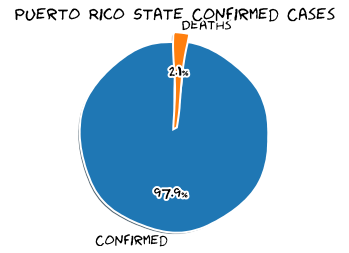

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
7250 (0.2269061919726536% of population)
Puerto Rico State Deaths
153 (2.110344827586207% of confirmed)



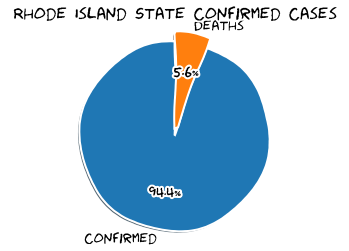

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
16661 (1.5757839432903158% of population)
Rhode Island State Deaths
927 (5.5638917231858835% of confirmed)



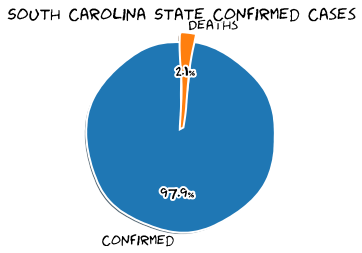

South Carolina State Total Population
5084127
South Carolina State Confirmed
33320 (0.6553730856841302% of population)
South Carolina State Deaths
716 (2.148859543817527% of confirmed)



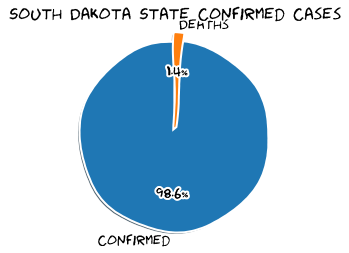

South Dakota State Total Population
882235
South Dakota State Confirmed
6681 (0.757281223256842% of population)
South Dakota State Deaths
91 (1.3620715461757222% of confirmed)



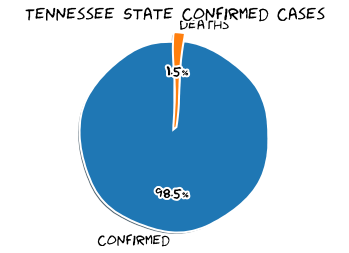

Tennessee State Total Population
6770010
Tennessee State Confirmed
40172 (0.5933816936754894% of population)
Tennessee State Deaths
584 (1.453748879816788% of confirmed)



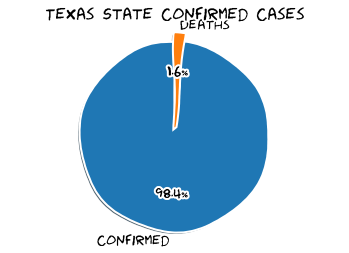

Texas State Total Population
28701845
Texas State Confirmed
150152 (0.5231440696582397% of population)
Texas State Deaths
2402 (1.599712291544568% of confirmed)



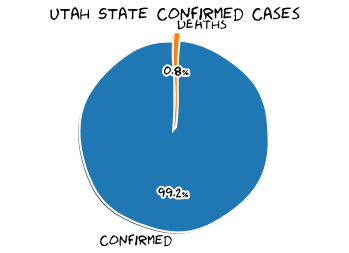

Utah State Total Population
3161105
Utah State Confirmed
21100 (0.6674881093794733% of population)
Utah State Deaths
167 (0.7914691943127963% of confirmed)



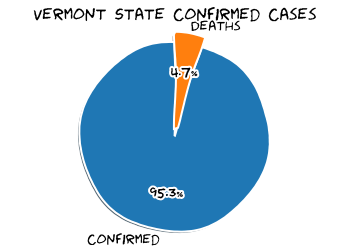

Vermont State Total Population
626299
Vermont State Confirmed
1202 (0.19192111116255972% of population)
Vermont State Deaths
56 (4.658901830282862% of confirmed)



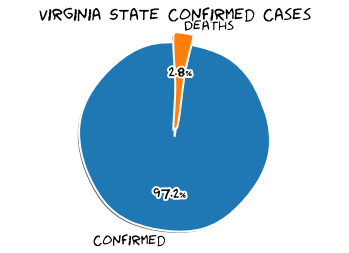

Virginia State Total Population
8517685
Virginia State Confirmed
61736 (0.7247978764182991% of population)
Virginia State Deaths
1732 (2.805494363094467% of confirmed)



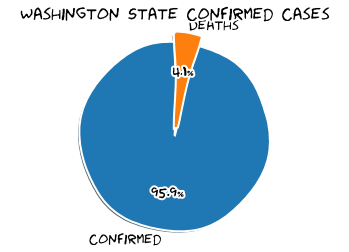

Washington State Total Population
7535591
Washington State Confirmed
31752 (0.4213604480391784% of population)
Washington State Deaths
1310 (4.125724363819602% of confirmed)



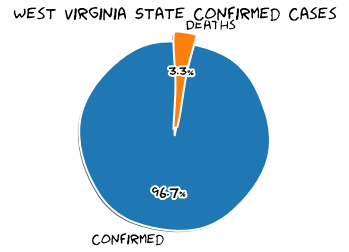

West Virginia State Total Population
1805832
West Virginia State Confirmed
2832 (0.15682521962175885% of population)
West Virginia State Deaths
93 (3.283898305084746% of confirmed)



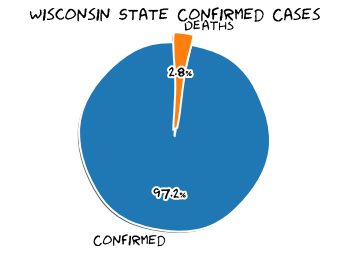

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
27743 (0.47721124101412427% of population)
Wisconsin State Deaths
777 (2.800706484518617% of confirmed)



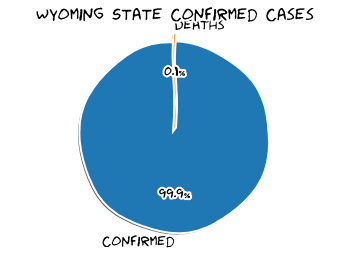

Wyoming State Total Population
577737
Wyoming State Confirmed
1417 (0.24526731021208611% of population)
Wyoming State Deaths
1 (0.07057163020465773% of confirmed)



In [10]:
for i in states:
    state_details(i)

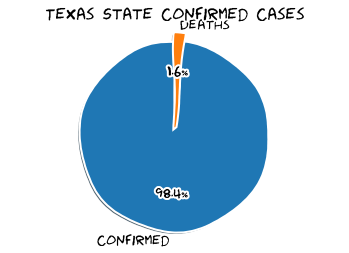

Texas State Total Population
28701845
Texas State Confirmed
150152 (0.5231440696582397% of population)
Texas State Deaths
2402 (1.599712291544568% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
2549629
US Deaths
125570

New York City Confirmed
214750
New York City Deaths
22470

Philippines Confirmed
36438
Philippines Deaths
1255



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 10178547},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 502589},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-29T13:33:49.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 5163973},
 'source': 'https://github.com/mathdroid/covid19'}

In [14]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-29 04:33:44,34.22333378,-82.46170658,103,0,0,103,"Abbeville, South Carolina, US",419.9453663309822,0.0
1,22001,Acadia,Louisiana,US,2020-06-29 04:33:44,30.2950649,-92.41419698,812,36,0,776,"Acadia, Louisiana, US",1308.7275364654686,4.433497536945813
2,51001,Accomack,Virginia,US,2020-06-29 04:33:44,37.76707161,-75.63234615,1039,14,0,1025,"Accomack, Virginia, US",3215.1256343606883,1.3474494706448508
3,16001,Ada,Idaho,US,2020-06-29 04:33:44,43.4526575,-116.24155159999998,1841,23,0,1818,"Ada, Idaho, US",382.2777608199557,1.249321021184139
4,19001,Adair,Iowa,US,2020-06-29 04:33:44,41.33075609,-94.47105874,15,0,0,15,"Adair, Iowa, US",209.73154362416108,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,,,,West Bank and Gaza,2020-06-29 04:33:44,31.9522,35.2332,1990,4,447,1539,West Bank and Gaza,39.008777170887456,0.20100502512562815
3779,,,,Western Sahara,2020-06-29 04:33:44,24.2155,-12.8858,10,1,8,1,Western Sahara,1.674116485025028,10.0
3780,,,,Yemen,2020-06-29 04:33:44,15.552726999999999,48.516388,1118,302,430,386,Yemen,3.7484114513902784,27.012522361359572
3781,,,,Zambia,2020-06-29 04:33:44,-13.133897,27.849332,1557,22,1311,224,Zambia,8.469341419224458,1.4129736673089275


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593437629000,40.767273,-73.971526,214750,0,22470,192280,New York City,36061,"New York City, New York, US",2575.923161,None,None,84036061,USA
1,California,US,1593437629000,34.308284,-118.228241,97918,0,3305,94613,Los Angeles,06037,"Los Angeles, California, US",975.365638,None,None,84006037,USA
2,Illinois,US,1593437629000,41.841448,-87.816588,89755,0,4542,85213,Cook,17031,"Cook, Illinois, US",1742.736688,None,None,84017031,USA
3,Arizona,US,1593437629000,33.348359,-112.491815,44962,0,746,44216,Maricopa,04013,"Maricopa, Arizona, US",1002.404683,None,None,84004013,USA
4,New York,US,1593437629000,40.740665,-73.589419,41754,0,2182,39572,Nassau,36059,"Nassau, New York, US",3077.106750,None,None,84036059,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,Kansas,US,1593437629000,39.784208,-97.087532,1,0,0,1,Washington,20201,"Washington, Kansas, US",18.497965,None,None,84020201,USA
3054,West Virginia,US,1593437629000,38.493709,-80.420202,1,0,0,1,Webster,54101,"Webster, West Virginia, US",12.324378,None,None,84054101,USA
3055,Wyoming,US,1593437629000,43.839612,-104.567488,1,0,0,1,Weston,56045,"Weston, Wyoming, US",14.436264,None,None,84056045,USA
3056,Montana,US,1593437629000,46.466525,-109.846464,1,0,0,1,Wheatland,30107,"Wheatland, Montana, US",47.036689,None,None,84030107,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593437629000,40.767273,-73.971526,214750,0,22470,192280,New York City,36061,"New York City, New York, US",2575.923161,None,None,84036061,USA
4,New York,US,1593437629000,40.740665,-73.589419,41754,0,2182,39572,Nassau,36059,"Nassau, New York, US",3077.106750,None,None,84036059,USA
5,New York,US,1593437629000,40.883201,-72.801217,41306,0,1978,39328,Suffolk,36103,"Suffolk, New York, US",2797.370447,None,None,84036103,USA
6,New York,US,1593437629000,41.162784,-73.757417,34780,0,1419,33361,Westchester,36119,"Westchester, New York, US",3594.809748,None,None,84036119,USA
28,New York,US,1593437629000,41.150279,-74.025605,13576,0,667,12909,Rockland,36087,"Rockland, New York, US",4167.114298,None,None,84036087,USA
42,New York,US,1593437629000,41.403375,-74.302408,10713,0,478,10235,Orange,36071,"Orange, New York, US",2783.031122,None,None,84036071,USA
73,New York,US,1593437629000,42.762490,-78.730637,7228,0,634,6594,Erie,36029,"Erie, New York, US",786.762193,None,None,84036029,USA
115,New York,US,1593437629000,41.764861,-73.743567,4198,0,151,4047,Dutchess,36027,"Dutchess, New York, US",1426.833165,None,None,84036027,USA
125,New York,US,1593437629000,43.146389,-77.693229,3690,0,266,3424,Monroe,36055,"Monroe, New York, US",497.458781,None,None,84036055,USA
161,New York,US,1593437629000,43.004919,-76.199712,2816,0,184,2632,Onondaga,36067,"Onondaga, New York, US",611.472049,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

392539

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1593437629000,40.767273,-73.971526,214750,0,22470,192280,New York City,36061,"New York City, New York, US",2575.923161,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
58,None,Philippines,1593437629000,12.879721,121.774017,36438,9956,1255,25227.0,None,None,Philippines,33.252089,None,None,608,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
